<a href="https://colab.research.google.com/github/van-dang/MRI-Cloud/blob/master/ArbitraryTimeSequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the code

In [0]:
# This program solves the Bloch-Torrey equation applied to computational diffusion MRI using 
# the finite element method coupled with the theta-method for the spatial discretization.

# The scope of usage: 
# (1) Single domains, Multilayered structures, manifolds
# (2) Membrane permeability for internal interfaces
#     Artificial permeability at the external interfaces
# (3) pure homogeneous Neumann BCs, (4) pseudo-periodic BCs

# Copyright (C) 2019 Van-Dang Nguyen (vdnguyen@kth.se)

# This file is part of DOLFIN.

# DOLFIN is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# DOLFIN is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Lesser General Public License for more details.

# You should have received a copy of the GNU Lesser General Public License
# along with DOLFIN. If not, see <http://www.gnu.org/licenses/>.

# First added:  2017-10-10
# Last changed: 2019-04-25

# This demo is maintained by Van-Dang Nguyen
# Please report possible problems to vdnguyen@kth.se

# Setting a working environment with FEniCS

In [14]:
from google.colab import files

import platform, sys
python_version=platform.python_version()
from distutils.version import LooseVersion, StrictVersion

if ( LooseVersion(python_version) < LooseVersion("3.0.0")):
    print("Python3 is needed!");
    print("How to fix: Runtime/Change_runtime_type/Python 3");
    sys.exit()
    
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics
    from dolfin import *; from mshr import *

gmsh_dir=!which gmsh
if len(gmsh_dir)==0:
  !apt-get install gmsh
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil
import sympy as sp

clear_output()

dolfin_version = dolfin.__version__
print ('dolfin version:', dolfin_version)

!rm -rf * # clean up all files

# Disable warnings
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger("rothemain.rothe_utils")
logging.getLogger('UFL').setLevel(logging.WARNING)
logging.getLogger('FFC').setLevel(logging.WARNING)

import warnings
warnings.filterwarnings("ignore")


dolfin version: 2019.1.0


#Load pre-defined functions

In [15]:
import sympy as sp  

exists = os.path.isfile('DmriFemBuitInFunc.py')
isupdate = False
if (exists==False or isupdate==True):
    if isupdate==True:
        !rm DmriFemBuitInFunc.py
    print("Load pre-defined functions from GitHub")
    !wget --quiet https://raw.githubusercontent.com/van-dang/MRI-Cloud/master/DmriFemBuitInFunc.py

from DmriFemBuitInFunc import *

Load pre-defined functions from GitHub


# Working on the mesh

Topological dimension:  2
Geometrical dimension:  2
Mesh size: #vertices: 441, #elements: 800


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


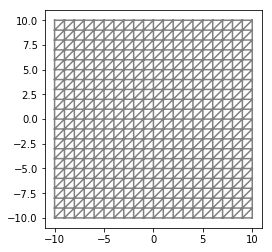

In [16]:
# domain = Circle(Point(0.,0.),5.0,60)
# mymesh = generate_mesh(domain, 15, "cgal")
mymesh = RectangleMesh(Point(-10,-10), Point(10,10), 20, 20, diagonal='right')
gdim = mymesh.geometry().dim()
tdim = mymesh.topology().dim()

print('Topological dimension: ',tdim)
print('Geometrical dimension: ',gdim)
print('Mesh size: #vertices: '+str(mymesh.num_vertices()) +', #elements: '+str(mymesh.num_cells()) );
plot(mymesh)

# Solve the Bloch-Torrey equation

Function Space for Single Domains has 2 components
(ur, ui): r-real, i-imaginary
Initialize a standard function space.
t:   0.00  T: 53700.00 dt: 1000.0 gnorm: 1.688585e-04 Completed 0.00%
t: 1000.00  T: 53700.00 dt: 1000.0 gnorm: 1.688585e-04 Completed 1.83%
t: 2000.00  T: 53700.00 dt: 1000.0 gnorm: 1.688585e-04 Completed 3.66%
t: 3000.00  T: 53700.00 dt: 1000.0 gnorm: 1.688585e-04 Completed 5.48%
t: 4000.00  T: 53700.00 dt: 1000.0 gnorm: 1.688585e-04 Completed 7.31%
t: 5000.00  T: 53700.00 dt: 1000.0 gnorm: 1.688585e-04 Completed 9.14%
t: 6000.00  T: 53700.00 dt: 1000.0 gnorm: 1.688585e-04 Completed 10.97%
t: 7000.00  T: 53700.00 dt: 1000.0 gnorm: 1.688585e-04 Completed 12.80%
t: 8000.00  T: 53700.00 dt: 1000.0 gnorm: 1.688585e-04 Completed 14.63%
t: 9000.00  T: 53700.00 dt: 1000.0 gnorm: 1.688585e-04 Completed 16.45%
t: 10000.00  T: 53700.00 dt: 1000.0 gnorm: 1.688585e-04 Completed 18.28%
t: 11000.00  T: 53700.00 dt: 1000.0 gnorm: 1.688585e-04 Completed 20.11%
t: 12000.00  T: 53700.

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


b: 1000.000, Signal: 4.191e+01, Normalized signal: 1.048e-01, dt: 1000.000, hmin: 1.414e+00, whole_vol: 400.000, vol_of_interest: 400.000, Free signal: 4.979e-02, elasped time 1.060 (s)

save to log.txt


DEBUG:matplotlib.axes._base:update_title_pos


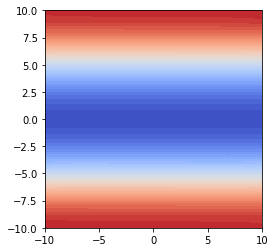

In [17]:
mri_simu = MRI_simulation()
mri_para = MRI_parameters()

#################################################################################
#########################  Pre-defined parameters ###############################
mri_para.bvalue = 1000;                              # bvalue
mri_para.delta, mri_para.Delta = 10600, 43100        # time sequence
mri_para.set_gradient_dir(mymesh, 0, 1, 0)           # gradient direction
mri_para.fs_sym = sp.Piecewise(
                (  1., mri_para.s < mri_para.delta ),
                (  0., mri_para.s < mri_para.Delta ),
                ( -1., mri_para.s < mri_para.Delta + mri_para.delta ),
                (  0., True )  
            ) 

mri_para.T = mri_para.Delta+mri_para.delta

mri_para.nperiod = 1
omega = 2.0*mri_para.nperiod*pi/mri_para.delta                    
mri_para.fs_sym = sp.Piecewise(
    (  sp.cos(omega*mri_para.s) ,                     mri_para.s < mri_para.delta ),
    (  0.,                                            mri_para.s < mri_para.Delta ),
    (  -sp.cos(omega*(mri_para.s-2.*mri_para.delta)), mri_para.s < mri_para.T ),
    (  0., True )  
)


mri_para.Apply()

mri_simu.k = 1000;                                    # time-step size
mri_simu.nskip = 1;                                  # frequency to print ouputs
mydomain = MyDomain(mymesh, mri_para)
mydomain.phase = None
mydomain.PeriodicDir = [0, 0, 0];             # Direction of the periodicity
mydomain.IsDomainPeriodic = False             # Confirm if the mesh if periodic
mydomain.IsDomainMultiple = False             # Confirm if the mesh is multiple
mydomain.kappa = 1e-5                         # Permeability
################################################################################
mydomain.Apply()   # Call Apply before setting the diffusion tensor
################################################################################
# Impose the diffusion coefficient
D0 = 3e-3
mydomain.D = D0;
#################################################################################

mri_simu.solve(mydomain, mri_para, PETScLUSolver("mumps"))

Post_processing(mydomain, mri_simu)
# Post_processing(mydomain, mri_simu,'Extracellular Simulation')

In [19]:
bvalue=mri_para.gnorm*mri_para.gnorm*1./8.*mri_para.delta*mri_para.delta*mri_para.delta*(3.-cos(4.*mri_para.nperiod*pi/mri_para.delta*mri_para.Delta))/(mri_para.nperiod*mri_para.nperiod)/(pi*pi);
 
print(bvalue)

999.9999999999993
